In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
import numpy as np
import pandas as pd

In [3]:
trainData = pd.read_csv("./sign_mnist_train.csv")
testData = pd.read_csv("./sign_mnist_test.csv")

In [4]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
testData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
y_train = trainData['label']
y_test = testData['label']

X_train = trainData.copy()
X_test = testData.copy()

del X_train['label']
del X_test['label']

X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

In [7]:
import matplotlib.pyplot as plt
X_train[0].shape

(28, 28, 1)

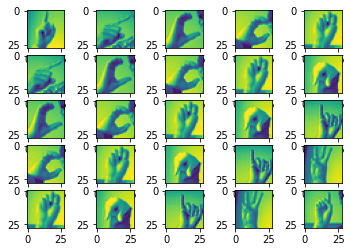

In [8]:
f, ax = plt.subplots(5,5)

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[i+j].reshape(28,28))

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

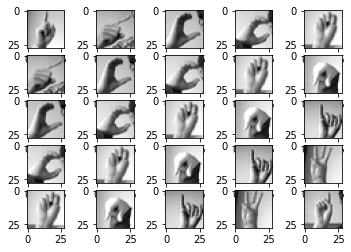

In [11]:
f, ax = plt.subplots(5,5)

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[i+j].reshape(28,28), cmap="gray")

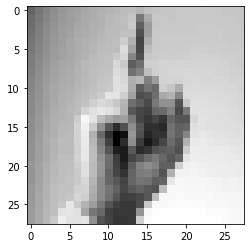

In [12]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray")

In [13]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
testGen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

testGen.fit(X_train)

In [15]:
testGen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


testGen.fit(X_train)

In [20]:
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.callbacks import History

In [21]:
X_train[0].shape

(28, 28, 1)

In [28]:
history = History()
model = Sequential()
model.add(Conv2D(100, (3,3), padding='same', use_bias=False, input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(75, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(50, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 100)       900       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 100)       400       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 100)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 100)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 75)        67500     
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 75)       

In [ ]:
history = model.fit(testGen.flow(X_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = (X_test, y_test))

Epoch 1/100
858/858 [==============================] - 78s 91ms/step - loss: 0.7639 - accuracy: 0.7551 - val_loss: 0.1510 - val_accuracy: 0.9536
Epoch 2/100
858/858 [==============================] - 78s 91ms/step - loss: 0.1185 - accuracy: 0.9620 - val_loss: 0.1091 - val_accuracy: 0.9582
Epoch 3/100
858/858 [==============================] - 80s 93ms/step - loss: 0.0685 - accuracy: 0.9767 - val_loss: 0.1306 - val_accuracy: 0.9512
Epoch 4/100
141/858 [===>..........................] - ETA: 1:00 - loss: 0.0551 - accuracy: 0.9820

In [88]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])